In [1]:
import duckdb
import pandas as pd
from statsbombpy import sb

In [25]:
con = duckdb.connect("example.db")


In [34]:
fouls = con.execute("SELECT * FROM fouls").df()
columnsf = [
    "player",
    "competition",
    "home_team",
    "away_team",
    "referee",
    "player_foul_commitedJ",
    "foul_committed_advantage_foul_commitedJ",
    "foul_committed_card_foul_commitedJ",
    "x_foul_commitedJ",
    "y_foul_commitedJ",
    "rowID"
]

fdf=fouls[columnsf]


In [35]:
fdf.head()

,player,competition,home_team,away_team,referee,player_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ,rowID
0,Zouhair Feddal,Spain - La Liga,Levante UD,Eibar,None,Borja González Tomás,NaN,None,113.8,35.9,ff9a47b4-1a6d-44c7-ba3e-c51ee74831cc
1,Daniel García Carrillo,Spain - La Liga,Levante UD,Eibar,None,Víctor Casadesús Castaño,NaN,None,62.3,12.8,ed724098-9d33-48a8-a7c2-2d742d2b05ca
2,David Juncà Reñé,Spain - La Liga,Levante UD,Eibar,None,Nabil Ghilas,NaN,None,79.6,47.8,1d9c8d0e-aa35-4fcb-ad54-359f1cbf4ad6
3,Víctor Casadesús Castaño,Spain - La Liga,Levante UD,Eibar,None,Gonzalo Escalante,NaN,None,65.9,25.6,e5962e06-bb4d-4008-9885-ed0e3db06c4b
4,José María Martín-Bejarano Serrano,Spain - La Liga,Levante UD,Eibar,None,Takashi Inui,NaN,None,76.4,24.1,a1f1fdee-0358-4d0e-a328-4dc0be869f26


In [41]:
fdf["player"].unique()

array(['Zouhair Feddal', 'Daniel García Carrillo', 'David Juncà Reñé',
       'Víctor Casadesús Castaño', 'José María Martín-Bejarano Serrano',
       'Sergio Gontán Gallardo', 'Adrián González Morales',
       'José Luis Morales Nogales', 'Aleksandar Pantić',
       'Juan Francisco García García', 'Takashi Inui',
       'Jefferson Andrés Lerma Solís', 'Antonio García Aranda',
       'Rubén García Santos', 'Víctor Camarasa Ferrando',
       'Sergio Enrich Ametller', 'Deyverson Brum Silva Acosta',
       'Ander Capa Rodríguez', 'Borja Ekiza Imaz', 'Roque Mesa Quevedo',
       'Jonathan Viera Ramos', 'Hernán Daniel Santana Trujillo',
       'Mubarak Wakaso', 'Vicente Iborra De La Fuente',
       'Dani Castellano Betancor', 'Sebastián Carlos Cristóforo Pepe',
       'Michael Krohn-Dehli', 'Pedro Bigas Rigo', 'Benoît Trémoulinas',
       'Grzegorz Krychowiak', 'Ciro Immobile', 'Víctor Machín Pérez',
       'José Antonio Reyes Calderón', 'Nabil El Zhar',
       'Pedro Mosquera Parada', 'Ped

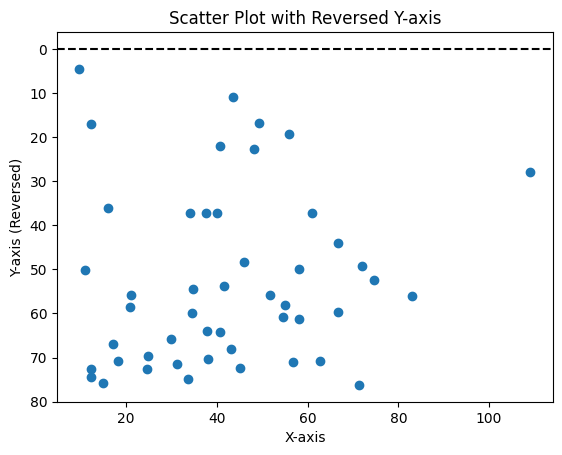

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame

# Scatter plot
plt.scatter(fdf[(fdf["player"] == "Cristiano Ronaldo dos Santos Aveiro")]["x_foul_commitedJ"], fdf[(fdf["player"] == "Cristiano Ronaldo dos Santos Aveiro")]["y_foul_commitedJ"])

# Reverse y-axis and set zero placement at the top
plt.gca().invert_yaxis()  # Reverse the y-axis
plt.axhline(0, color='black', linestyle='--')  # Optional: Add a horizontal line at y=0 for reference

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis (Reversed)")
plt.title("Scatter Plot with Reversed Y-axis")

# Show the plot
plt.show()


In [48]:
fouls_received = fdf.groupby("player")["player_foul_commitedJ"].apply(list).reset_index()

# Count the number of fouls received and find the player committing the most fouls
fouls_received["foul_count"] = fouls_received["player_foul_commitedJ"].apply(len)
fouls_received["top_committer"] = fouls_received["player_foul_commitedJ"].apply(lambda x: pd.Series(x).mode()[0])
fouls_received = fouls_received.sort_values(by="foul_count", ascending=False)

fouls_received.head(10)

,player,player_foul_commitedJ,foul_count,top_committer
350,Neymar da Silva Santos Junior,"[Mario Gaspar Pérez Martínez, Tomás Pina Isla,...",159,Juan Francisco Torres Belén
373,Pedro Pablo Hernández,"[Augusto Matías Fernández, Saúl Ñíguez Esclape...",118,Juan Antonio Rodríguez Villamuela
143,Fabián Ariel Orellana Valenzuela,"[Jorge Resurrección Merodio, Alfred John Momar...",100,Manuel Trigueros Muñoz
76,Carlos Alberto Vela Garrido,"[Emiliano Buendía, Emiliano Buendía, Mehdi Lac...",98,Roberto Lago Soto
199,Isaac Ajayi Success,"[Ander Capa Rodríguez, Ander Capa Rodríguez, D...",97,Abdoul Karim Yoda
237,Jonathan Viera Ramos,"[Grzegorz Krychowiak, Marco Andreolli, Ignacio...",96,Javier Fuego Martínez
408,Rubén Rochina Naixes,"[Simão Mate, Lucas Hernández Pi, Gabriel Ferná...",96,Lucas Hernández Pi
101,Daniel Ceballos Fernández,"[Juan Antonio Rodríguez Villamuela, Juan Anton...",96,Ivan Rakitić
104,Daniel Parejo Muñoz,"[Jon Bautista Orgilles, Jon Bautista Orgilles,...",91,Andrés Iniesta Luján
381,Raúl García Escudero,"[Juan Muñoz Muñoz, Jefferson Andrés Lerma Solí...",87,José Raúl Baena Urdiales


In [ ]:
con = duckdb.connect("example.db")
passes = con.execute("SELECT * FROM passes").df()

columnsp = [
    "player",
    "competition",
    "home_team",
    "away_team",
    "referee",
    "x",
    "y",
    "pass_end_x",
    "pass_end_y",
    "pass_length",
    "player_shotFromPass",
    "shot_type_shotFromPass",
    "shot_outcome_shotFromPass",
    "shot_statsbomb_xg_shotFromPass",
    "pass_succes",
    "f3rd_pass",
    "pass_progression",
    "shot_assisted_pass",
    "goal_assisted_pass",
    "cross_pass",
    "box_pass",
    "rowID"
]

pdf=passes[columnsp]



In [17]:
pdf["shot_type_shotFromPass"].unique()

array([None, 'Open Play'], dtype=object)

<Axes: xlabel='shot_statsbomb_xg_shotFromPass', ylabel='goal_assisted_pass'>

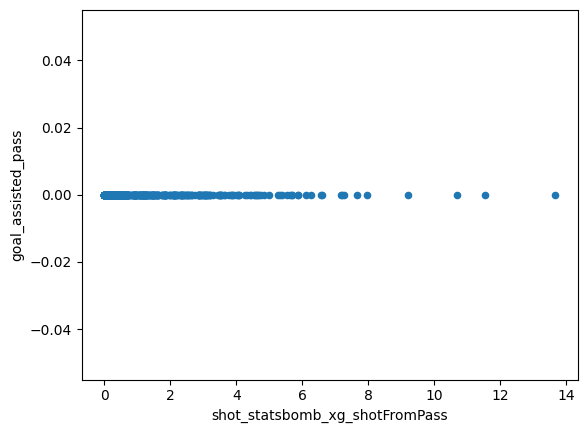

In [11]:
pdf[["player","shot_statsbomb_xg_shotFromPass","goal_assisted_pass"]].groupby(by=["player"]).sum().plot.scatter(x="shot_statsbomb_xg_shotFromPass",y="goal_assisted_pass")

In [18]:
con.close()